# Gradient Descent

#### Load Libraries

In [6]:
try:
    # check if the required libraries are installed
    import sympy
    import IPython
    import matplotlib
except:
    # install the required libraries if thy are not yet installed
    import subprocess
    from sys import executable as exe
    subprocess.check_call([exe, "-m", "pip", "install", "sympy", "ipython", "matplotlib"])
finally:
    # import as shorter name
    import sympy as sym
    from IPython.display import display, Math
    import matplotlib.pyplot as plt

#### Define The Function & Find Its Derivative

In [7]:
import sympy as sym
from IPython.display import display, Math

fx = "5 * x**3 - 20 * x + 2"                    # string version of the function

x_symbol = sym.symbols("x")

func = sym.sympify(fx, locals={"x": x_symbol})  # parse the string function

display(Math("f(x):"), func)                    # display the function

deriv = sym.Derivative(func, x_symbol).doit()   # get the derivative of fx
display(Math("f\'(x):"), deriv)                 # display the derivative
deriv = sym.lambdify(x_symbol, deriv, "math")   # turn into lambda

<IPython.core.display.Math object>

5*x**3 - 20*x + 2

<IPython.core.display.Math object>

15*x**2 - 20

#### Define The Variables and Constants Needed

In [8]:
# max number of iterations that can be done
MAX_ITER = 1000

# learning rate
LEARNING_RATE = 0.01

# initialize current interation and previous step size
cur_iter = 0
prev_step_size = 0.5

# initialize the value of x
cur_x = 0.1

In [9]:
while cur_iter < MAX_ITER:
    prev_x = cur_x
    cur_x = cur_x - LEARNING_RATE * deriv(prev_x)
    prev_step_size = abs(cur_x - prev_x)
    cur_iter += 1

glob_min = func.subs(x_symbol, cur_x)

print(f"The global minima is y={glob_min:.3f}, which is found at x={cur_x:.3f}")

The global minima is y=-13.396, which is found at x=1.155


#### Plot the Function and Show Global Minima

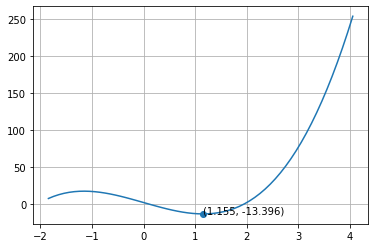

In [10]:
x_coor = list()
y_coor = list()
RANGE = 3

i = cur_x - RANGE
for _ in range(RANGE * 2 * 10):
    x_coor.append(i)
    y_coor.append(func.subs(x_symbol, i))
    i += 0.1
    
plt.plot(x_coor, y_coor)                        # plot the function
plt.scatter([cur_x], [glob_min])                # plot the point of global minima
plt.annotate(f"({cur_x:.3f}, {glob_min:.3f})",  # add coordinate text next to the point
             (cur_x, glob_min))
plt.grid()                                      # add grid behind the graph
plt.show()